# Метод Нестерова

In [4]:
import numpy as np
import sympy as sy
from sympy import Symbol
from sympy.tensor.array import Array
from matplotlib import pyplot as plt

In [5]:
def df_p(fun, x):
    return np.double(fun.subs([(vx[i], x[i]) for i in range(len(vx))]))
    
vx = [Symbol('x' + str(i)) for i in range(2)]

# функция "Птицы"
f = -sy.sin(vx[0])*sy.exp((1 - sy.cos(vx[1]))**2) - sy.cos(vx[1])*sy.exp((1 - sy.sin(vx[0]))**2) - (vx[0] - vx[1])**2
# символьный градиент
df = Array([sy.diff(f, _) for _ in vx])

In [135]:
xn = np.array([-2, -3])
gamma = 0.2
lr = 1e-3# - шаг
e = 1e-5 # - точность
res = [xn]
norm = 1 # - норма градиента

u = 0 # - вектор обновления параметров 
u_prev = 0 # - предыдущий вектор 

it=0 # - итерации
        
while (norm > e) and (it < 10000):
    u = gamma * u_prev + lr * df_p(df, (xn - gamma * u_prev))
    u_prev = u
    xn = xn - u
    res.append(xn)
    norm = np.linalg.norm(df_p(df, xn))
    it+=1

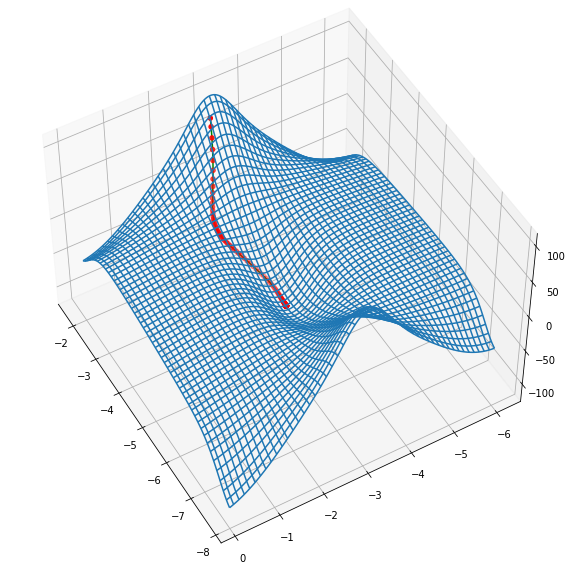

In [139]:
path = np.array(res)
fig, ax = plt.subplots(subplot_kw=dict(projection='3d'), figsize=(10, 10))

surface = lambda x: -np.sin(x[0])*np.exp((1 - np.cos(x[1]))**2) - np.cos(x[1])*np.exp((1 - np.sin(x[0]))**2) - (x[0] - x[1])**2

X = np.linspace(xn[0]-3, xn[0]+3, 200)
Y = np.linspace(xn[1]-3, xn[1]+3, 200)
X, Y = np.meshgrid(X, Y)
Z = surface([X,Y])
ax.plot_wireframe(X, Y, Z)

F = surface([path.T[0], path.T[1]])
ax.plot(path.T[0], path.T[1], F, zdir='z', color='g')
ax.scatter(path.T[0], path.T[1], F, zdir='z', color='r')
ax.view_init(50, 150)